# Modeling And Evaluation

This notebook was used for running models and comparing them.

To run the models, it uses classes in the `/src` subdirectory:
- `WineConfig`: Contains the configuration information information (such as model hyperparameters)
- `WineModelPipeline`: Loads a `WineConfig` instance and from it runs the desired models. It stores the results in a results dictionary for subsequent evaluation


## Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from datetime import datetime

%matplotlib inline 

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Add src directory to path where pipeline etc. are
sys.path.append('src')

# Import Pipeline and Config classes
from config import WineConfig
from pipeline import WineModelPipeline

# Import a banner generator for printouts
from utils import print_section_header

# Set plotting style
plt.style.use('default')
# Set color scheme as colorblind friendly
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Additional plot settings for saving figures

# Compact figure settings
FIGSIZE_COMPACT = (3, 2.5)
DPI_SAVE_COMPACT = 100

# Medium sized settings
FIGSIZE_MID = (5,4)
DPI_SAVE_MID = 150

# Large Settings (multiple plots)
FIGSIZE_LARGE = (10,6)
DPI_SAVE_LARGE = 250

print(f"Modeling pipeline started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Modeling pipeline started at: 2025-09-22 10:18:22


## Initialize the pipeline

In [2]:
# Create configuration
config = WineConfig()
# Initialize the modeling pipeline
pipeline = WineModelPipeline(config)

# Load and prepare data
X_train, X_test, y_train, y_test = pipeline.load_and_prepare_data()

print(f"\nData preparation complete!")
print(f"Feature names: {pipeline.get_feature_names()}")
print(f"Target Class names: {pipeline.get_class_names()}")

VALIDATING CONFIGURATION
....Config looks fine!
LOADING AND PREPARING DATA
Loaded wine data: 5320 rows × 13 columns
Encoded wine_type: red=0, white=1
Prepared 12 features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type_binary']
Target variable: quality_binary
Train/test split: 4256 / 1064 samples
Target encoding: {'regular': 0, 'premium': 1}
Applied log1p transformation to chlorides feature
Applied log1p transformation to sulphates feature
Applied log1p transformation to residual sugar feature
Applied log1p transformation to fixed acidity feature
Applied log1p transformation to volatile acidity feature
Applied log1p transformation to free sulfur dioxide feature
Applied StandardScaler to 12 features
  Training data - mean: -0.000, std: 1.000
DATA PREP SUMMARY
Training features: 4256 × 12
Test features: 1064 × 12

Training set class distribution:
  regul

## Run all selected models

In [3]:

# Run all model experiments
pipeline.train_selected_models()

# print out the results of training, ranked.
pipeline.print_model_training_results()


TRAINING MODELS
From Configuration file loaded: ['rf', 'svm', 'logistic', 'mlp']
FINDING BEST RANDOM FOREST
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training completed in 1.4 seconds
Best parameters: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 55}
Best CV score: 0.8290
Test accuracy: 0.8374
F1 score: 0.8366

 Additional Search Details
  Total fits performed: 1
  Parameter grid: {'n_estimators': [55], 'max_depth': [23], 'max_features': ['sqrt'], 'min_samples_split': [10], 'min_samples_leaf': [3]}
FINDING BEST SVM
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training completed in 3.9 seconds
Best parameters: {'C': 2, 'gamma': 0.8}
Best CV score: 0.8167
Test accuracy: 0.8280
F1 score: 0.8272

 Additional Search Details
  Total fits performed: 1
  Parameter grid: {'C': [2], 'gamma': [0.8]}
FINDING BEST LOGISTIC REGRESSION MODEL
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training co

## Detailed Results Summary Table

In [4]:
results_df = pipeline.create_detailed_results_table()

# display(results_df.round(4))

print(results_df.round(4).to_markdown())

results_df.to_csv("results/detailed_results.csv",index=False)


|          |   accuracy |   weighted_precision |   weighted_recall |   weighted_f1 |   premium_precision |   premium_recall |   regular_precision |   regular_recall |   premium_f1 |
|:---------|-----------:|---------------------:|------------------:|--------------:|--------------------:|-----------------:|--------------------:|-----------------:|-------------:|
| rf       |     0.8374 |               0.8359 |            0.8374 |        0.8366 |              0.5736 |           0.5594 |              0.8973 |           0.9026 |       0.5664 |
| svm      |     0.828  |               0.8264 |            0.828  |        0.8272 |              0.5482 |           0.5347 |              0.8916 |           0.8968 |       0.5414 |
| logistic |     0.7434 |               0.835  |            0.7434 |        0.7683 |              0.4083 |           0.7822 |              0.935  |           0.7343 |       0.5365 |
| mlp      |     0.843  |               0.8257 |            0.843  |        0.8187 |      

## Confusion Matrices

CONFUSION MATRIX FOR: rf
Saving matrix for rf in figures/confusion_matrix_rf.png


<Figure size 300x250 with 0 Axes>

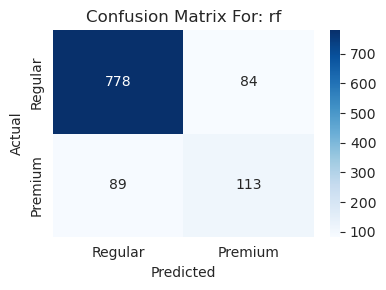

CONFUSION MATRIX FOR: svm
Saving matrix for svm in figures/confusion_matrix_svm.png


<Figure size 300x250 with 0 Axes>

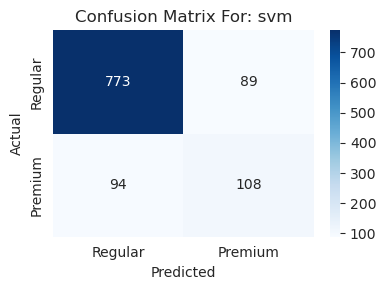

CONFUSION MATRIX FOR: logistic
Saving matrix for logistic in figures/confusion_matrix_logistic.png


<Figure size 300x250 with 0 Axes>

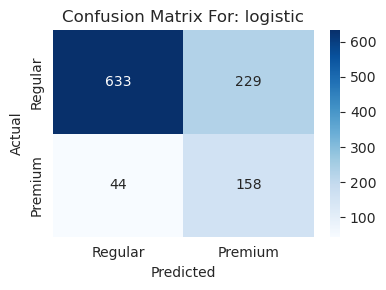

CONFUSION MATRIX FOR: mlp
Saving matrix for mlp in figures/confusion_matrix_mlp.png


<Figure size 300x250 with 0 Axes>

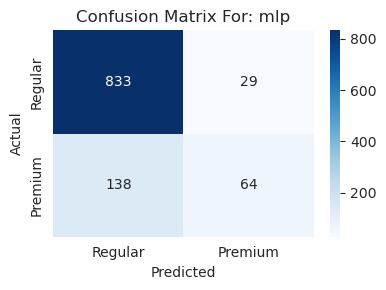

In [5]:


for model in config.get_models_to_run():
    print_section_header(f"CONFUSION MATRIX FOR: {model}")
    cm = pipeline.get_confusion_matrix(model)
    plt.figure(figsize=(FIGSIZE_COMPACT))
    fig = pipeline.create_confusion_plot_from_matrix(model,cm)
    filepath = "figures/confusion_matrix_" + model +".png"
    print(f"Saving matrix for {model} in {filepath}")
    plt.savefig(filepath,dpi=DPI_SAVE_COMPACT, bbox_inches='tight')
    plt.show()


## Metric Plots - Recall etc.



<Figure size 500x400 with 0 Axes>

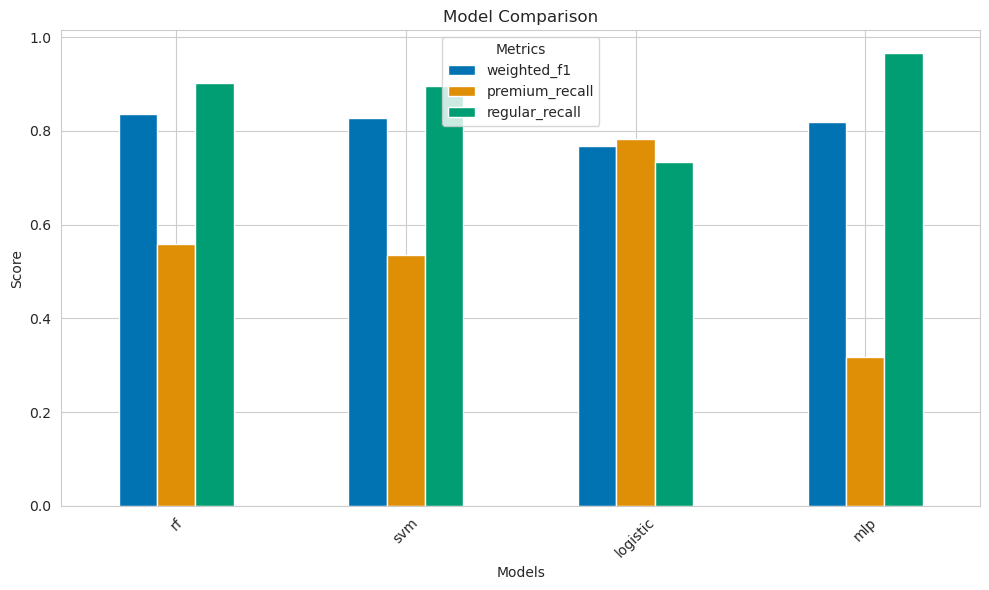

In [6]:
plt.figure(figsize=(FIGSIZE_MID))
fig = pipeline.plot_metrics_comparison(results_df, ['weighted_f1','premium_recall','regular_recall'])

plt.savefig('figures/Recall_Comparisons.png', dpi=DPI_SAVE_MID, bbox_inches='tight')

plt.show()
                                 
    

# ROC analysis

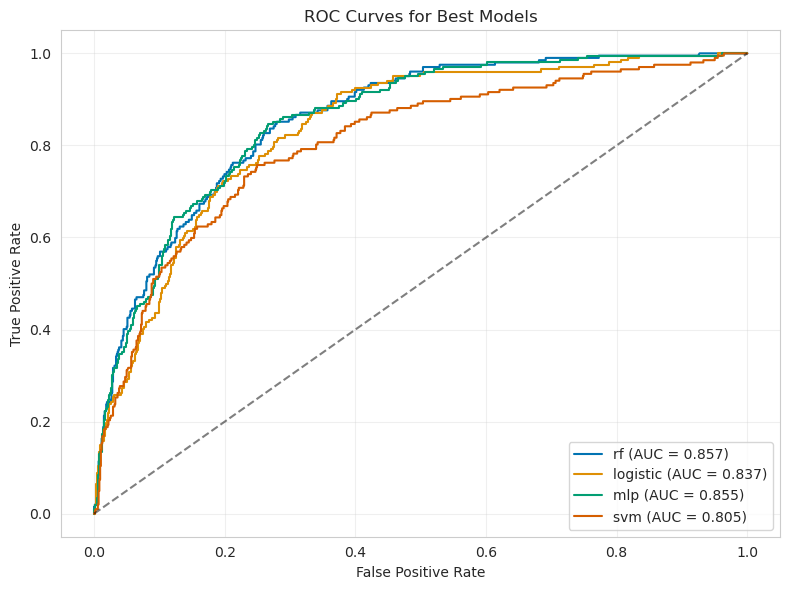

In [7]:

fig = pipeline.plot_roc_curves(['rf','logistic','mlp','svm'])

plt.savefig('figures/ROC.png', dpi=300, bbox_inches='tight')

plt.show()

## Feature Importance (from Random Forest)

In [8]:

rf_model = pipeline.get_model('rf')
feature_names = pipeline.get_feature_names()
    
# Get feature importance
importance_data = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_data
    }).sort_values('importance', ascending=False)
    
print_section_header("RANDOM FOREST FEATURE IMPORTANCE")

print(feature_importance_df)

print(feature_names)

RANDOM FOREST FEATURE IMPORTANCE
                 feature  importance
10               alcohol    0.222987
7                density    0.119376
4              chlorides    0.092531
1       volatile acidity    0.092127
6   total sulfur dioxide    0.075486
2            citric acid    0.073331
9              sulphates    0.072998
8                     pH    0.068285
3         residual sugar    0.063973
5    free sulfur dioxide    0.062964
0          fixed acidity    0.052781
11      wine_type_binary    0.003161
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type_binary']
